<a href="https://colab.research.google.com/github/UDICatNCHU/SparkTutorial/blob/master/2019_10_3_(student)_PM25%EF%BC%8B%E4%B8%89%E5%80%8B%E7%B7%B4%E7%BF%92%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 環境初始化 (大約三至五分鐘)
! wget -O init_env.sh https://www.dropbox.com/s/6bnwn8u2hz19s59/init_env.sh && \
bash init_env.sh

--2019-10-03 06:22:33--  https://www.dropbox.com/s/6bnwn8u2hz19s59/init_env.sh
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6bnwn8u2hz19s59/init_env.sh [following]
--2019-10-03 06:22:33--  https://www.dropbox.com/s/raw/6bnwn8u2hz19s59/init_env.sh
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3bd129e1b4e8d0bb332b943f0a.dl.dropboxusercontent.com/cd/0/inline/Apu1EtAOCHHMKeuJFIQrfYZN-Z5vX1p7q5Y2B4mp9kQfdEO5tM9a0oLKTugyHxrLRuvTWZINAu3nVmT8FsvJxr0iOIPqoUGAGit2IIS4CePCCg/file# [following]
--2019-10-03 06:22:34--  https://uc3bd129e1b4e8d0bb332b943f0a.dl.dropboxusercontent.com/cd/0/inline/Apu1EtAOCHHMKeuJFIQrfYZN-Z5vX1p7q5Y2B4mp9kQfdEO5tM9a0oLKTugyHxrLRuvTWZINAu3nVmT8FsvJxr0iOIPqoUGAGit2IIS4CePCCg/file
Resolving uc3bd129e1b4

In [0]:
import os, sys
os.environ['SPARK_HOME'] = "/usr/local/spark"
os.environ['PYSPARK_PYTHON'] = "/usr/local/bin/python"
sys.path.append("/usr/local/spark/python/")
sys.path.append("/usr/local/spark/python/lib/pyspark.zip")
sys.path.append("/usr/local/spark/python/lib/py4j-0.10.4-src.zip")

In [0]:
from pyspark import SparkContext
from pyspark import SparkConf
sc =SparkContext()

# 利用Spark 分析台灣2015 PM2.5資料集

<a id="load_data"></a>
## 上傳台灣2015一整年空氣監測資料 

### 步驟1: 將2015空氣監控資料，上傳至colab

In [0]:
!wget -O pm25.csv "https://www.dropbox.com/s/zkn3ba7pitv83el/pm2.5Taiwan.csv?dl=0"

--2019-10-03 06:24:00--  https://www.dropbox.com/s/zkn3ba7pitv83el/pm2.5Taiwan.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkn3ba7pitv83el/pm2.5Taiwan.csv [following]
--2019-10-03 06:24:01--  https://www.dropbox.com/s/raw/zkn3ba7pitv83el/pm2.5Taiwan.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb445c7aae7c290749b5150e4d5.dl.dropboxusercontent.com/cd/0/inline/ApuuyIItfIn_z-nGvXGzU5JUIHRaLN8UaI8jaT6M0ylGO6eU5l03EFU2JgIUEWdAdfVnXYTxnLj_2FV1JouBy-pYeU-3P6NqQOIzAXezTNhLIA/file# [following]
--2019-10-03 06:24:01--  https://ucb445c7aae7c290749b5150e4d5.dl.dropboxusercontent.com/cd/0/inline/ApuuyIItfIn_z-nGvXGzU5JUIHRaLN8UaI8jaT6M0ylGO6eU5l03EFU2JgIUEWdAdfVnXYTxnLj_2FV1JouBy-pYeU-3P6NqQOIzAXezTNhLIA/file
Resol

In [0]:
!ls

init_env.sh  pm25.csv  sample_data  spark-2.2.0-bin-hadoop2.7.tgz


In [0]:
weather = sc.textFile("./pm25.csv")

### 步驟2: 試試看是否成功上傳  (使用count( ), first( ), collect( ), take( ) )

In [0]:
weather.count()
weather.first()

'日期,測站,測項,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23'

In [0]:
weather.take(5)

['日期,測站,測項,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23',
 '2015/01/01,龍潭,AMB_TEMP,14,14,14,13,13,13,12,12,13,14,14,14,14,14,13,13,12,11,11,11,11,11,11,11',
 '2015/01/01,龍潭,CO,0.69,0.72,0.69,0.64,0.54,0.47,0.45,0.48,0.51,0.54,0.54,0.5,0.47,0.38,0.36,0.35,0.34,0.37,0.34,0.29,0.26,0.22,0.19,0.18',
 '2015/01/01,龍潭,NO,0.3,0.1,0.6,2,2,1.9,2.2,3.1,3.7,4.3,4.3,4.5,3.3,4.1,3.1,3.6,3.6,2.8,2.8,2.5,2.2,1.4,2.1,2',
 '2015/01/01,龍潭,NO2,11,9.6,8.7,9.1,9.6,9.9,11,13,11,12,12,11,11,9.9,9.9,10,11,13,11,10,8.2,7.3,6.5,5.5']

# 練習1: 讓我們求取2015年，大里每小時的平均pm25數值。
## 注意事項：
1. 資料分割：原始資料每一行為一個觀測值，我們必須將資料進行分割，才能逐一計算與進行操作。
2. 資料清洗：在氣象局的原始資料裡，有些數值由於當初偵測時有異常，所以會加註特別符號如\*\#等特殊符號，這些數值我們必須先經過前處理，我們才能進行算術運算。
3. 資料選擇：將大里資料挑選出來
4. 產生key-value，也就是(小時,pm25值)
5. 利用flatMap(), reduceByKey(), groupByKey()，將不同日期但相同時間的pm25值收集起來。
6. 計算平均值, 標準差, 最大最小值。


### 步驟一：資料分割 (使用map () 與 split( ))

In [0]:
weatherParse = weather.map(lambda line : line.split(","))
print(weatherParse.first())

['日期', '測站', '測項', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


### 步驟二：將大里站資料從全部資料集中挑選出來 (filter)

須留意unicode與string的差別,  u'大里'

In [0]:
wea_dali = weatherParse.filter(lambda x: x[1] == '大里' and x[2]== "PM2.5")
print(wea_dali.take(50))

[['2015/01/01', '大里', 'PM2.5', '53', '55', '58', '53', '43', '36', '35', '42', '55', '64', '65', '59', '52', '44', '47', '41', '43', '40', '42', '35', '28', '20', '18', '16'], ['2015/01/02', '大里', 'PM2.5', '21', '22', '26', '23', '20', '18', '15', '21', '21', '25', '29', '32', '34', '29', '32', '39', '51', '51', '47', '43', '43', '48', '47', '53'], ['2015/01/03', '大里', 'PM2.5', '48', '48', '43', '38', '37', '36', '37', '34', '37', '46', '64', '77', '83', '75', '68', '69', '64', '65', '59', '66', '71', '66', '57', '48'], ['2015/01/04', '大里', 'PM2.5', '60', '56', '53', '43', '53', '53', '52', '44', '44', '50', '49', '51', '45', '42', '40', '38', '36', '43', '51', '63', '68', '72', '66', '58'], ['2015/01/05', '大里', 'PM2.5', '48', '42', '42', '34', '34', '28', '34', '35', '45', '47', '54', '46', '35', '19', '16', '21', '24', '28', '37', '52', '60', '62', '64', '61'], ['2015/01/06', '大里', 'PM2.5', '59', '40', '34', '25', '27', '29', '26', '33', '42', '47', '38', '24', '14', '8', '17', '30',

### 步驟三：資料清洗 (使用 map(), str.strip())
#### 在氣象局的原始資料裡，有些數值由於當初偵測時有異常，所以會加註特別符號如\*\#等特殊符號，或者沒有取到數值為一空值，這些數值我們必須先經過前處理，我們才能進行算術運算。
1. ```2015/01/29 大里 PM2.5 14 14 12 7 1 0 4 6 12 16 15  52x 38x 30 29 27 29 24 24 21 19 19 23```
2. ```2015/01/16 大里 PM2.5 16 15 17 16 16 13 5 10 14 30 30 25 -4# 22 23 30 33 40 43 45 37 34 38 43``` 

In [0]:
def strip_symbol(x):
    for i in range(len(x)):
        x[i] = x[i].strip("-*#x") # remove non-digits
        if x[i]=="": x[i]="0"
    return x

wea_dali = wea_dali.map(strip_symbol)

### 步驟四：key value pair的產生 (重要的操作概念)
*將每小時資料轉成(小時,pm數值)，以求取每小時的平均值。

例如：
    2015/01/01 大里 PM2.5 53 55 58 53 43 36 35 42 55 64 65 59 52 44 47 41 43 40 42 35 28 20 18 16
    --> [(0, 53) (1, 55) (2, 58) (3, 53) (4, 43) ... (21, 20) (22, 18) (23, 16)]


In [0]:
print(wea_dali.first())

['2015/01/01', '大里', 'PM2.5', '53', '55', '58', '53', '43', '36', '35', '42', '55', '64', '65', '59', '52', '44', '47', '41', '43', '40', '42', '35', '28', '20', '18', '16']


In [0]:
def hourKeyGen(x):
    hourkeypair = []
    x=x[3:]
    for i, value in enumerate(x):
      print(i, value)
      hourkeypair.append((i, float(value)))
    return hourkeypair

wea_dali_byHourkey = wea_dali.map(hourKeyGen)

wea_dali_byHourkey.first()

[(0, 53.0),
 (1, 55.0),
 (2, 58.0),
 (3, 53.0),
 (4, 43.0),
 (5, 36.0),
 (6, 35.0),
 (7, 42.0),
 (8, 55.0),
 (9, 64.0),
 (10, 65.0),
 (11, 59.0),
 (12, 52.0),
 (13, 44.0),
 (14, 47.0),
 (15, 41.0),
 (16, 43.0),
 (17, 40.0),
 (18, 42.0),
 (19, 35.0),
 (20, 28.0),
 (21, 20.0),
 (22, 18.0),
 (23, 16.0)]

### 步驟五： 利用flatMap(), reduceByKey(), groupByKey()，將不同日期但相同時間的pm25值收集起來。(使用flatMap)

In [0]:
byHourkey = wea_dali.flatMap(hourKeyGen)
byHourkey.reduceByKey(lambda x,y: x+y).take(10)

[(0, 9838.0),
 (2, 9229.0),
 (4, 8346.0),
 (6, 8121.0),
 (8, 9580.0),
 (10, 10919.0),
 (12, 11505.0),
 (14, 10172.0),
 (16, 10396.0),
 (18, 10396.0)]

### 步驟六： 計算大里區每個小時區間中，平均之pm25數值 (使用reduceByKey)

In [0]:
avg_pm25_hour = byHourkey.reduceByKey(lambda x,y: x+y)
avg_pm25_hour.map(lambda x:(x[0],x[1]/365)).collect()

[(0, 26.953424657534246),
 (2, 25.284931506849315),
 (4, 22.865753424657534),
 (6, 22.24931506849315),
 (8, 26.246575342465754),
 (10, 29.915068493150685),
 (12, 31.52054794520548),
 (14, 27.86849315068493),
 (16, 28.482191780821918),
 (18, 28.482191780821918),
 (20, 30.136986301369863),
 (22, 29.161643835616438),
 (1, 25.704109589041096),
 (3, 23.76164383561644),
 (5, 21.975342465753425),
 (7, 23.572602739726026),
 (9, 29.252054794520546),
 (11, 30.265753424657536),
 (13, 30.65205479452055),
 (15, 28.147945205479452),
 (17, 28.295890410958904),
 (19, 29.315068493150687),
 (21, 29.783561643835615),
 (23, 27.852054794520548)]

### 步驟七： 根據pm25平均濃度，進行排序。使用top( )

In [0]:
avg_pm25_hour = byHourkey.reduceByKey(lambda x,y: x+y)
avg_pm25_hour.map(lambda x:(x[0],x[1]/365.0)).map(lambda x: (x[1],x[0])).top(24)

[(31.52054794520548, 12),
 (30.65205479452055, 13),
 (30.265753424657536, 11),
 (30.136986301369863, 20),
 (29.915068493150685, 10),
 (29.783561643835615, 21),
 (29.315068493150687, 19),
 (29.252054794520546, 9),
 (29.161643835616438, 22),
 (28.482191780821918, 18),
 (28.482191780821918, 16),
 (28.295890410958904, 17),
 (28.147945205479452, 15),
 (27.86849315068493, 14),
 (27.852054794520548, 23),
 (26.953424657534246, 0),
 (26.246575342465754, 8),
 (25.704109589041096, 1),
 (25.284931506849315, 2),
 (23.76164383561644, 3),
 (23.572602739726026, 7),
 (22.865753424657534, 4),
 (22.24931506849315, 6),
 (21.975342465753425, 5)]

### 步驟八： 計算每個時間點的統計值，例如最大值、最小值、平均值、標準差(使用 groupByKey()與mapValues())

In [0]:
import numpy as np

hour_stat_list = byHourkey.groupByKey().mapValues(list).collect()

for i in sorted(hour_stat_list):
    print (i[0],max(i[1]),min(i[1]),np.mean(i[1]),np.var(i[1]))

0 117.0 0.0 26.953424657534246 382.0224882717208
1 110.0 0.0 25.704109589041096 362.93710639894914
2 107.0 0.0 25.284931506849315 354.74621129667855
3 102.0 0.0 23.76164383561644 330.0555151060236
4 98.0 0.0 22.865753424657534 310.53814224057044
5 88.0 0.0 21.975342465753425 299.8651454306624
6 96.0 0.0 22.24931506849315 273.9624995308688
7 102.0 0.0 23.572602739726026 286.573495965472
8 109.0 0.0 26.246575342465754 311.0241321073372
9 114.0 0.0 29.252054794520546 361.73920810658655
10 114.0 0.0 29.915068493150685 394.8064852692814
11 117.0 0.0 30.265753424657536 407.89375867892664
12 112.0 0.0 31.52054794520548 404.74820791893416
13 103.0 0.0 30.65205479452055 385.36112591480577
14 94.0 0.0 27.86849315068493 346.4484593732408
15 104.0 0.0 28.147945205479452 354.9753724901482
16 93.0 0.0 28.482191780821918 297.4003677988365
17 90.0 0.0 28.295890410958904 303.5343666729217
18 88.0 0.0 28.482191780821918 299.4825595796585
19 99.0 0.0 29.315068493150687 342.48429348845934
20 101.0 0.0 30.

# 練習2: 請求取2015年，全國pm2.5最高的前十個工作站測點以及其日期。

In [0]:
### weatherParse 為原始資料集
### 資料清洗
def strip_symbol(x):
    for i in range(len(x)):
        #x[i] = x[i].strip("-*#x") # remove non-digits
        if "#" in x[i]:x[i]="0"
        if "*" in x[i]:x[i]="0"
        if "x" in x[i]:x[i]="0"
        if "-" in x[i]:x[i]="0"
        if x[i]=="": x[i]="0"
    return x

def date_location_time (x):
    date_loc_time_measure = []
    date = x[0]
    loc = x[1]
    x = x[3:]
    for hour, i in enumerate(x):
      date_loc_time_string = date+" at "+ loc +" : "+str(hour)+ u'點'
      date_loc_time_measure.append((date_loc_time_string, int(i)))
    
    return date_loc_time_measure

In [0]:
weather = sc.textFile("./pm25.csv")
weatherParse = weather.map(lambda line : line.split(","))

top10pm25 = weatherParse.filter(lambda x: x[2]=="PM2.5")\
            .map(strip_symbol)\
            .flatMap(date_location_time)\
            .map(lambda x: (x[1],x[0]))\
            .top(10)          

for i in top10pm25:
    print(i)

(319, '2015/04/18 at 埔里 : 21點')
(301, '2015/01/01 at 馬公 : 1點')
(296, '2015/01/01 at 馬公 : 0點')
(238, '2015/04/18 at 埔里 : 22點')
(238, '2015/01/06 at 金門 : 11點')
(213, '2015/01/06 at 金門 : 10點')
(196, '2015/05/11 at 朴子 : 21點')
(196, '2015/01/03 at 三義 : 22點')
(193, '2015/05/11 at 朴子 : 20點')
(189, '2015/01/06 at 金門 : 9點')


In [0]:
precTop10=[]
stationsTop10=[]
for result in top10pm25:
    precTop10.append(result[0])
    stationsTop10.append(result[1])

Plot your results.

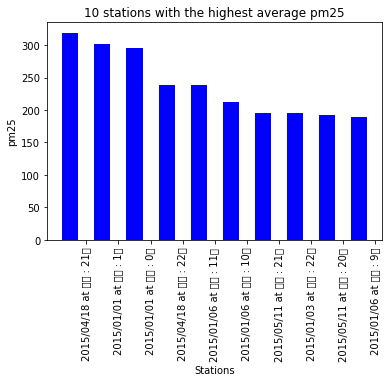

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, precTop10, bar_width, color='b')
plt.xlabel('Stations')
plt.ylabel('pm25')
plt.title('10 stations with the highest average pm25')
plt.xticks(index + bar_width, stationsTop10, rotation=90)
plt.show()

# 練習3: 請算算看2015全國哪個測站，紫爆天數最多？
### 假設當日平均值大於60，則算該日該地區紫爆


In [0]:
pm25_data_set = weatherParse.filter(lambda x: x[2]=="PM2.5")

### 資料清洗
def strip_symbol(x):
    for i in range(len(x)):
        #x[i] = x[i].strip("-*#x") # remove non-digits
        if "#" in x[i]:x[i]="0"
        if "*" in x[i]:x[i]="0"
        if "x" in x[i]:x[i]="0"
        if "-" in x[i]:x[i]="0"
        if x[i]=="": x[i]="0"
    return x

def computeAverage(x):
    location = x[1]
    x = x[3:]
    y = [float(i) for i in x]
    return (location, sum(y)/len(y))

clean_pm25_data_set = pm25_data_set.map(strip_symbol)
Worst = clean_pm25_data_set\
        .map(computeAverage)\
        .filter(lambda x:x[1]>60)\
        .groupByKey()\
        .mapValues(list)\
        .map(lambda x:(x[0],len(x[1])))\
        .sortBy(lambda x:x[1], ascending=False).collect()

for loc in Worst:
  print(loc)




('竹山', 28)
('斗六', 28)
('崙背', 25)
('金門', 21)
('善化', 20)
('埔里', 18)
('復興', 17)
('左營', 17)
('橋頭', 16)
('小港', 15)
('嘉義', 14)
('麥寮', 13)
('二林', 13)
('楠梓', 13)
('大里', 13)
('鳳山', 12)
('忠明', 12)
('大寮', 12)
('仁武', 12)
('臺西', 11)
('馬祖', 10)
('西屯', 10)
('林園', 10)
('前鎮', 10)
('臺南', 9)
('新營', 9)
('屏東', 9)
('安南', 9)
('潮州', 8)
('新港', 8)
('南投', 8)
('前金', 8)
('彰化', 7)
('線西', 7)
('朴子', 6)
('萬華', 4)
('沙鹿', 4)
('頭份', 4)
('桃園', 4)
('新莊', 4)
('林口', 3)
('苗栗', 3)
('美濃', 3)
('古亭', 3)
('中山', 3)
('龍潭', 2)
('竹東', 2)
('平鎮', 2)
('三重', 2)
('永和', 2)
('松山', 2)
('新店', 2)
('基隆', 2)
('觀音', 1)
('萬里', 1)
('湖口', 1)
('板橋', 1)
('大園', 1)
('豐原', 1)
('新竹', 1)
('士林', 1)
('土城', 1)
('中壢', 1)
